In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use the Reunion spider data for testing
First quickly munge the spider data into the form we need.

In [3]:
sp_dir = "/home/isaac/Continuosity/MESS/empirical_data/Reunion_spiders/"
sp_abunds = pd.read_csv(sp_dir + "spider_abunds_df.txt", index_col=0, header=0)
sp_pis = pd.read_csv(sp_dir + "spider.pis", sep=" ", index_col=1, header=None)
sp_pis.index = [x.split("/")[1].split(".")[0] for x in sp_pis.index]
sp_df = pd.concat([sp_abunds, sp_pis], axis=1, sort=False)
sp_df.columns = ["abundance", "pi"]
sp_df.to_csv(sp_dir + "spider.dat", header=True)
print(len(sp_df), np.sum(sp_df["abundance"]))
sp_df[:5]

(57, 5493)


,abundance,pi
GL-01a,150,0.011126
GL-01b,107,0.023247
GL-01c,32,0.000252
GL-02,2,0.000000
GL-03,200,0.028499


# Select the best model

In [3]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile, algorithm="rf")
est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=True)
display(est, proba)
display(cla.feature_importances())

Selecting features:
  community_assembly_model	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'abundance_pi_cor', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4']
All selected features: S abund_h1 abund_h2 abund_h3 abund_h4 pi_h1 pi_h2 pi_h3 pi_h4 mean_pi std_pi skewness_pi kurtosis_pi median_pi iqr_pi abundance_pi_cor SGD_0 SGD_1 SGD_2 SGD_3 SGD_4
Finding best model parameters.
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.6min finished


{'n_estimators': 1000, 'min_samples_split': 5, 'bootstrap': False, 'max_depth': 80, 'min_samples_leaf': 2}


,community_assembly_model
estimate,competition


,competition,filtering,neutral
community_assembly_model,0.701167,0.033917,0.264917


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.100909,0.152322,0.063318,0.059151,0.06019,0.062136,0.053333,0.049147,0.042789,0.040641,0.046152,0.033765,0.032371,0.003736,0.023801,0.035083,0.080854,0.016961,0.017095,0.015388,0.010859


# Estimate parameters

In [7]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

rgr = MESS.inference.Regressor(empirical_df=sp_df, simfile=simfile, algorithm="rfq")
#rgr.set_targets(target_list=["alpha", "_lambda"])

est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=True)
display(est, rgr.feature_importances())

Calculating prediction interval(s)


,alpha,J_m,ecological_strength,m,speciation_prob,_lambda
estimate,3685.6,2934118.8,3.049635,0.006074,0.000770,0.88548
lower 0.025,1325.0,74037.0,1.883200,0.001310,0.000123,0.80060
upper 0.975,4977.0,4960633.0,5.087760,0.009882,0.001528,0.99000


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.022752,0.084214,0.028474,0.024894,0.030092,0.027449,0.014157,0.016416,0.014461,0.243931,0.028158,0.030357,0.031589,0.006573,0.186852,0.0,0.068647,0.038757,0.013700,0.018494,0.015410,0.010516,0.016337,0.008230,0.006561,0.007170,0.005810
J_m,0.051127,0.061829,0.041159,0.037009,0.044458,0.043094,0.032184,0.034837,0.042270,0.043284,0.052929,0.061805,0.064594,0.002796,0.021612,0.0,0.097470,0.047306,0.025925,0.033834,0.033324,0.026627,0.029260,0.019923,0.017060,0.015750,0.018536
ecological_strength,0.045683,0.078048,0.041750,0.038794,0.043806,0.041474,0.025806,0.026311,0.032427,0.045958,0.060981,0.064691,0.061265,0.004348,0.018995,0.0,0.097098,0.052401,0.028130,0.030637,0.034863,0.027845,0.030011,0.020181,0.018056,0.015107,0.015337
m,0.222357,0.066605,0.048690,0.033841,0.038766,0.028351,0.021443,0.022067,0.025366,0.036084,0.051394,0.039098,0.046954,0.001722,0.011312,0.0,0.091490,0.046586,0.022230,0.025948,0.030856,0.019618,0.021562,0.011269,0.014030,0.010934,0.011429
speciation_prob,0.236081,0.180437,0.020245,0.036437,0.068841,0.035879,0.018383,0.011370,0.013674,0.050566,0.047779,0.008833,0.013483,0.000337,0.038403,0.0,0.026226,0.132091,0.004073,0.008937,0.010780,0.006013,0.014103,0.003733,0.003821,0.004234,0.005237
_lambda,0.008049,0.040056,0.020675,0.059669,0.725278,0.008656,0.004298,0.005332,0.004167,0.011925,0.018938,0.011152,0.007655,0.000988,0.007005,0.0,0.014897,0.017858,0.004517,0.004454,0.004289,0.003809,0.005518,0.002392,0.004414,0.002173,0.001838


## Perform posterior predictive check

  [####################] 100% Performing simulations 
Calculating PCs and plotting


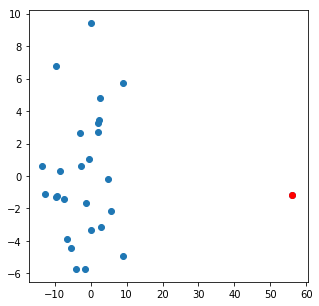

In [22]:
MESS.inference.posterior_predictive_check(empirical_df=sp_df,
                                          parameter_estimates=est,
                                          est_only=True,
                                          nsims=20,
                                          verbose=True)

## Save regressor to file/model to file

In [150]:
rgr.feature_importances()
#rgr.model_by_target

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.015795,0.066961,0.018036,0.012658,0.025727,0.027068,0.009332,0.002480,0.002773,0.275834,0.008189,0.022957,0.010469,0.004996,0.369852,0.0,0.059932,0.050365,0.001897,0.001806,0.002297,0.002108,0.004731,0.002443,0.000570,0.000000,0.000721
_lambda,0.006080,0.018718,0.006266,0.040721,0.859859,0.003194,0.001113,0.004015,0.001348,0.009954,0.010465,0.003409,0.005999,0.001550,0.002724,0.0,0.006535,0.013376,0.001096,0.000300,0.000758,0.000035,0.000916,0.000294,0.000857,0.000169,0.000251


# Trash below here

,competition,filtering,neutral
community_assembly_model,0.74625,0.025833,0.227917


  NB: No features found relevant for target J_m
      Fall back to using all parameters.


,alpha,J_m,ecological_strength,m,speciation_prob,_lambda
estimate,3696.930982,2.658593e+06,4.465569,0.005156,0.000833,0.910659
lower 0.025,1336.375590,1.327991e+05,1.526813,0.001312,0.000118,0.808775
upper 0.975,4926.031178,4.887587e+06,9.596386,0.009544,0.004088,0.998372


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi,trees
alpha,NaN,0.055138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088699,0.026735,0.021461,0.024905,0.066885,0.316790,0.034617,0.269218,0.006336,0.054150,NaN,NaN,NaN,0.035065,NaN,NaN
J_m,0.053238,0.048200,0.033212,0.033269,0.029151,0.025702,0.03047,0.020942,0.016635,0.014345,0.020083,0.060234,0.042796,0.034577,0.039778,0.098288,0.021022,0.062817,0.042728,0.004054,0.046849,0.036924,0.032327,0.041186,0.061366,0.049807,0.0
ecological_strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
m,0.329681,0.061032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,0.050196,0.041593,0.051049,0.117748,NaN,NaN,0.051919,NaN,NaN,NaN,NaN,0.067449,0.071112,0.073885,NaN
speciation_prob,0.235190,0.168127,NaN,0.013811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198409,0.027797,0.033306,0.077287,NaN,0.023754,NaN,0.068064,NaN,0.043962,0.016174,0.014271,0.018357,NaN,0.061490,NaN
_lambda,NaN,0.025444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047443,0.026725,0.078086,0.776453,NaN,NaN,NaN,0.019045,NaN,NaN,NaN,NaN,NaN,NaN,0.026804,NaN


  [####################] 100% Performing simulations 
Calculating PCs and plotting


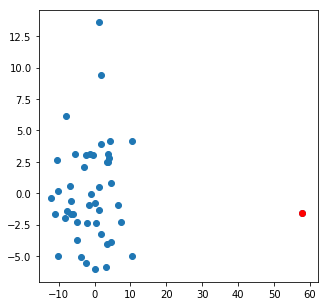

In [23]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile)
est, proba = cla.predict()
display(proba)

rgr = MESS.inference.Regressor(empirical_df=sp_df, simfile=simfile)
est = rgr.predict()
display(est, rgr.feature_importances())

MESS.inference.posterior_predictive_check(empirical_df=sp_df,
                                          parameter_estimates=est,
                                          est_only=True,
                                          nsims=20,
                                          verbose=True)

In [218]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
abc = AdaBoostClassifier()
abc.fit(cla.X, cla.y)
abc.predict(cla.empirical_sumstats)

abr = AdaBoostRegressor()
abr.fit(rgr.X, rgr.y["alpha"])
abr.predict(rgr.empirical_sumstats)

array([4128.40555556])

(array([445., 607., 143., 188., 174., 153., 142.,  93.,  32.,  10.]),
 array([  3. ,  32.1,  61.2,  90.3, 119.4, 148.5, 177.6, 206.7, 235.8,
        264.9, 294. ]),
 <a list of 10 Patch objects>)

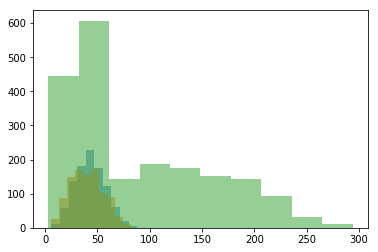

In [32]:
df = pd.read_csv(simfile, sep="\t", header=0)
param = "S"
plt.hist(df[df["community_assembly_model"] == "competition"][param], alpha=.5)
plt.hist(df[df["community_assembly_model"] == "filtering"][param], alpha=.5)
plt.hist(df[df["community_assembly_model"] == "neutral"][param], alpha=.5)


In [25]:
cla.feature_importances()

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.104787,0.147012,0.062519,0.058322,0.059917,0.059802,0.049695,0.049071,0.045937,0.042155,0.046642,0.035952,0.034173,0.00403,0.022879,0.037079,0.075653,0.018427,0.017443,0.016786,0.011719
